# Custom sorting of plot series

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

## Bar plot of manufacturer - Default Output

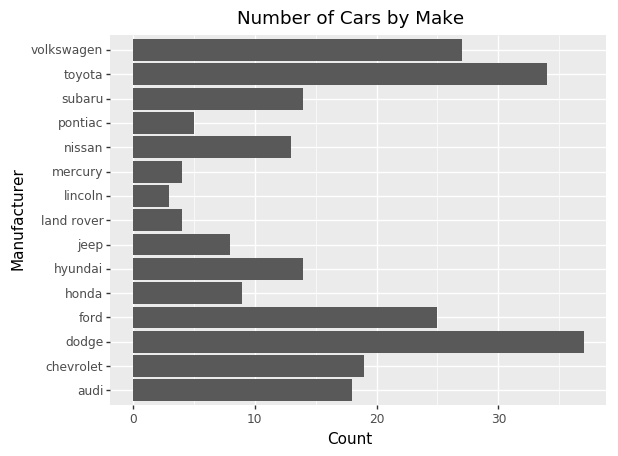

<ggplot: (97654321012345679)>

In [2]:
(ggplot(mpg)
 + aes(x='manufacturer') 
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

## Bar plot of manufacturer - Ordered by count 

By default the discrete values along an ordered alphabetically. If we want a specific ordering
we use an *ordered* categorical variable.

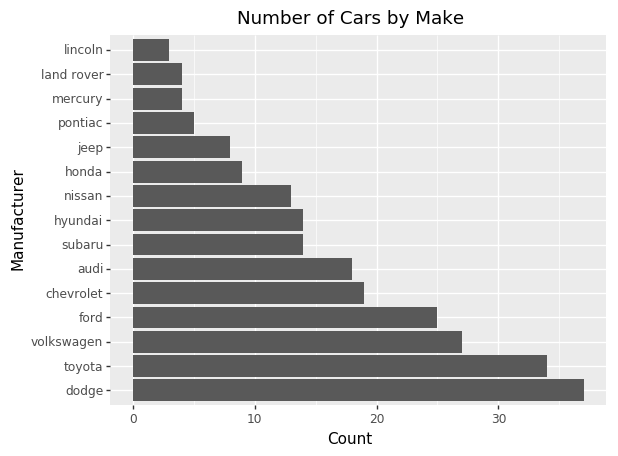

<ggplot: (97654321012345679)>

In [3]:
# Determine order and create a categorical type
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = CategoricalDtype(categories=manufacturer_list, ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string. 
mpg['manufacturer_cat'] = mpg['manufacturer'].astype(str).astype(manufacturer_cat)

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

We could also modify the **existing manufacturer category** to set it as ordered instead of having to create a new CategoricalDtype and apply that to the data. 

```python
mpg['manufacturer_cat'] = mpg['manufacturer'].cat.reorder_categories(manufacturer_list, ordered=True )
```

### Further Reading
Pandas documentation of how to use categorical data in practice.
> https://pandas.pydata.org/pandas-docs/stable/categorical.html

Pandas API Reference for categorical.
>  http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical

Pandas documentation of pd.Categorical.
> http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Categorical.html